In [52]:
import pandas as pd
import numpy as np

In [53]:
iris=pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Lab_3_Data-Cleaning-Challenge\iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [55]:
missing_values=iris.index[iris.isnull().any(axis=1)]
missing_values

Int64Index([7, 8, 9, 10, 11], dtype='int64')

In [56]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [57]:
iris.head(11)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [58]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [59]:
mean_setosa=np.mean(iris.loc[lambda iris: iris['class'] =='Iris-setosa'])
mean_setosa

C:\Users\Administrateur\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sepal_length_cm    5.020408
sepal_width_cm     3.410204
petal_length_cm    1.459184
petal_width_cm     0.250000
dtype: float64

In [60]:
iris_fixed= iris.fillna(mean_setosa)

In [61]:
iris_fixed.head(11)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa


Text(0.5, 1.0, 'petal width')

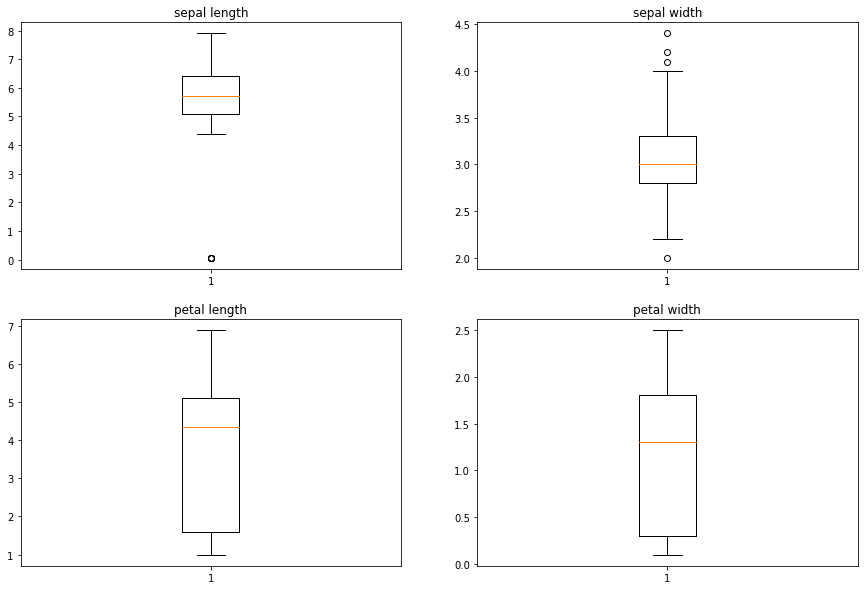

In [62]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].boxplot(iris_fixed['sepal_length_cm'])
axs[0, 0].set_title('sepal length')

axs[0, 1].boxplot(iris_fixed['sepal_width_cm'])
axs[0, 1].set_title('sepal width')

axs[1, 0].boxplot(iris_fixed['petal_length_cm'])
axs[1, 0].set_title('petal length')

axs[1, 1].boxplot(iris_fixed['petal_width_cm'])
axs[1, 1].set_title('petal width')

In [63]:
stats = iris_fixed.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
sepal_length_cm,150.0,5.644627,1.312781,0.055,5.1,5.70,6.4,7.9,1.3
sepal_width_cm,150.0,3.054667,0.433123,2.000,2.8,3.00,3.3,4.4,0.5
petal_length_cm,150.0,3.758667,1.764420,1.000,1.6,4.35,5.1,6.9,3.5
petal_width_cm,150.0,1.203667,0.763252,0.100,0.3,1.30,1.8,2.5,1.5


In [64]:
outliers = pd.DataFrame(columns=iris_fixed.columns)
 
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = iris_fixed[(iris_fixed[col] < lower) | 
                   (iris_fixed[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Outlier
77,0.067,3.0,5.0,1.7,Iris-versicolor,sepal_length_cm
78,0.060,2.9,4.5,1.5,Iris-versicolor,sepal_length_cm
79,0.057,2.6,3.5,1.0,Iris-versicolor,sepal_length_cm
80,0.055,2.4,3.8,1.1,Iris-versicolor,sepal_length_cm
81,0.055,2.4,3.7,1.0,Iris-versicolor,sepal_length_cm
15,5.700,4.4,1.5,0.4,Iris-setosa,sepal_width_cm
32,5.200,4.1,1.5,0.1,Iris-setosa,sepal_width_cm
33,5.500,4.2,1.4,0.2,Iris-setosa,sepal_width_cm
60,5.000,2.0,3.5,1.0,Iris-versicolor,sepal_width_cm


In [65]:
outliers.value_counts().sum()

9

In [66]:
index_to_drop=outliers.index
index_to_drop

Int64Index([77, 78, 79, 80, 81, 15, 32, 33, 60], dtype='int64')

In [67]:
iris_fixed=iris_fixed.drop(index=index_to_drop)

In [68]:
iris_fixed

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
print(len(iris_fixed)/len(iris)*100, '%')

94.0 %


In [71]:
iris_fixed.to_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Lab_3_Data-Cleaning-Challenge\iris-data_cleaned.csv')